# Seminar Neurale Netwerken Week 1

Deze week leer je simpele neurale netwerken toe te passen op datasets

Eerst zijn er een aantal vragen over neurale netwerken, daarna maak je code voor een neuraal netwerk compleet. Als laatste bouw je zelf een neuraal netwerk.





Dit is een jupyter notebook. Je kunt in 'code-blokken' gewoon python code schrijven.
Wanneer je op shift-enter drukt, zal het huidig geselecteerde code-blok worden uitgevoerd en de output zal direct onder het code-blok verschijnen.

Hieronder een klein voorbeeld dat het begin van de fibonacci reeks print.
Klik in het code-block en druk op shift+enter

In [ ]:
a = 0
b = 1
for i in range(13):
    print(a)
    
    tmp = b
    b = a + b
    a = tmp


0
1
1
2
3
5
8
13
21
34
55
89
144


Variabelen worden onthouden en gedeeld tussen alle code-blocks


In [ ]:
variabel = 22 

In [ ]:
print(variabel)

22


Voer het volgende code blok meerdere keren uit en beschrijf in het tekst blok erna wat er gebeurt met de variabel. Het tekst blok is het eerstvolgende blok waar nu 'Double-click (or enter) to edit' staat


In [ ]:
variabel = variabel + 1
print(variabel)

23


# Neurale Netwerken





## Voor wat soort problemen kun je neurale netwerken goed gebruiken?


## Waar zijn neurale netwerken (nog) niet goed in?


## Hoe veel neuronen heeft de eerste hidden layer van het netwerk in de volgende afbeelding?




Deze afbeelding is van een denkbeeldig neuraal netwerk
![neuraal netwerk 1](https://puc.science.ru.nl/seminar_neurale_netwerken/week1/werkcollege/netwerk.png)



## Leg in eigen woorden uit wat forward pass is.



## Wat kan er gebeuren als je te weinig train data gebruikt?


We bespreken deze vragen dadelijk klassikaal. Je kan nu al beginnen aan de programmeer opdrachten hierna. Als je sommige vragen niet weet, kun je ze ook op het internet opzoeken.

# Huizenprijzen


Voer het volgende code-blok uit en upload kc_house_data.csv

kc_house_data.csv is een normaal [csv](https://en.wikipedia.org/wiki/Comma-separated_values) bestand. Je zou het kunnen openen in excel om de data te bekijken. De data gaat over de huizenmarkt in King County USA. De beschrijving van de dataset is te vinden op [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [ ]:
from google.colab import files

files.upload()


Saving kc_house_data.csv to kc_house_data (1).csv


{'kc_house_data.csv': b'id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15\n"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650\n"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639\n"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062\n"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000\n"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503\n"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930\n"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003

##Pandas

We laden de data nu in onze code door middel van [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

We gebruiken de 'pandas' package om onze data in op te slaan en te manipuleren zodat het in de juiste vorm aan het neurale netwerk geleverd kan worden

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('kc_house_data.csv')


Met Pandas kun je gemakkelijk data inzien en veranderen. Zo kun je bijvoorbeeld de eerste tien huizen zien met de volgende regel code


In [ ]:
dataset.head(10)

id             date      price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000   221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000   538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000   180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000   604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000   510000.0  ... -122.045           1800        7503
5  7237550310  20140512T000000  1225000.0  ... -122.005           4760      101930
6  1321400060  20140627T000000   257500.0  ... -122.327           2238        6819
7  2008000270  20150115T000000   291850.0  ... -122.315           1650        9711
8  2414600126  20150415T000000   229500.0  ... -122.337           1780        8113
9  3793500160  20150312T000000   323000.0  ... -122.031           2390        7570

[10 rows x 21 columns]

Je kunt als volgt kijken hoe groot een dataset is:

In [ ]:
print(len(dataset))

Je ziet een aantal kolom namen, je kunt de data uit één kolom (bijvoorbeeld price) krijgen op de volgende manier:

In [ ]:
print(dataset['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


Selecteer alle data uit de kolom sqft_living


In [ ]:
## Typ hier je code
# ...

Je kunt 'gewoon' rekenen met de waardes uit de kolommen. De volgende regel geeft aan dat voor elke rij in de dataset, de prijs moet worden gedeeld door het aantal slaapkamers. 


In [ ]:
print(dataset['price'] / dataset['bedrooms'])

0         73966.666667
1        179333.333333
2         90000.000000
3        151000.000000
4        170000.000000
             ...      
21608    120000.000000
21609    100000.000000
21610    201050.500000
21611    133333.333333
21612    162500.000000
Length: 21613, dtype: float64


Converteer de 'sqft_living' van [square foot naar square meter](https://www.google.com/search?hl=nl&q=sqft%20to%20m2)

In [ ]:
## Typ hier je code
# dataset['m2_living'] = ...
dataset['m2_living'] = dataset['sqft_living'] * 0.09290304  # ***ANSWER***

Je kunt ook de gemiddelde waarde (mean) of de [standaardafwijking](https://www.wikiwand.com/nl/Standaardafwijking) (std) van een kolom laten berekenen. Bereken zo ook het gemiddelde aantal vierkante meters per woning.

In [ ]:
print(dataset['price'].mean())
print(dataset['price'].std())

## Typ hier je code
# ...
print(dataset['m2_living'].mean()) # ***ANSWER***

540088.1417665294
367127.1964826997
193.22900839466607


 Een [histogram](https://wikikids.nl/Histogram) is een diagram waarin met kolommen wordt weergegeven hoe vaak iets voorkomt. 
Je kunt [als volgt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) een histogram maken.

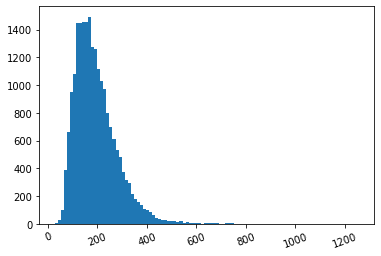

In [ ]:
dataset['m2_living'].hist(bins = 100, grid = False, xrot = 20)

We zien in deze histogram dat het grootste deel van de woningen rond de 200m2 oppervlakte heeeft. We zien ook dat bijna alle woningen tussen de 50m2 en 400m2 aan oppervlakte hebben. Een hisogram geeft ons inzicht in hoe onze data is verdeeld.

We kunnen hetzelfde doen voor de waardes van de woningen. Hierbij geven we aan dat we alleen de woningen van onder de 2 miljoen willen zien.

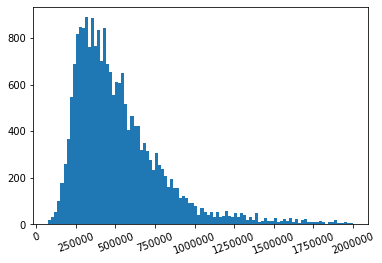

In [ ]:
prijzen = dataset['price']
indexen = prijzen < 2000000 #We berekenen de indexen van de prijzen onder de 2 miljoen dollar. 
prijzen[indexen].hist(bins = 100, grid = False, xrot = 20)

Je kunt ook data uit meerdere kolommen tegerlijke tijd halen:


In [ ]:
print(dataset[['bathrooms','floors']])

       bathrooms  floors
0           1.00     1.0
1           2.25     2.0
2           1.00     1.0
3           3.00     1.0
4           2.00     1.0
...          ...     ...
21608       2.50     3.0
21609       2.50     2.0
21610       0.75     2.0
21611       2.50     2.0
21612       0.75     2.0

[21613 rows x 2 columns]


Hier zetten we de data die we als input willen gebruiken in `input_data`. Hetgeen wat we willen voorspellen zetten we in `labels`. Sommige data uit `dataset` gebruiken we (nog) niet, bijvoorbeeld `id` en `zipcode`. 

In [ ]:
input_data = dataset[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']] #'waterfront','view','condition','grade','sqft_above','sqft_basement',

#normalisatie van de data naar waardes met een gemiddelde van 0 en schaal de data zodat het allemaal tussen -1 en 1 zit. Je hoeft nog niet te begrijpen hoe of waarom we dit doen. 
#Als je je data niet zou normaliseren, zou je netwerk vaak (bijna) niks kunnen leren
input_data = (input_data - input_data.mean()) / (input_data.max() - input_data.min())

labels = dataset[['price']]

input_data.head(5)


bedrooms  bathrooms  sqft_living  sqft_lot    floors  yr_built
0 -0.011238  -0.139345    -0.067917 -0.005729 -0.197724 -0.139175
1 -0.011238   0.016905     0.036989 -0.004764  0.202276 -0.173958
2 -0.041541  -0.139345    -0.098860 -0.003094 -0.197724 -0.330479
3  0.019065   0.110655    -0.009049 -0.006122 -0.197724 -0.052219
4 -0.011238  -0.014345    -0.030181 -0.004257 -0.197724  0.139086

## Hoe veel input variabelen zal ons netwerk moeten hebben? (Hint: kijk in het code blok hierboven)

We splitsen de data op in een train en test set. Het netwerk traint alleen op de train data, we testen het vervolgens op de test set. we doen dit met [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) van sklearn

In [ ]:
from sklearn.model_selection import train_test_split #een functie die een dataset willekuerig kan opslitsen in een train en test set
input_data_train, input_data_test, labels_train, labels_test = train_test_split(input_data,labels,test_size=0.2,random_state = 42)


## Waarom is het belangrijk dat we de dataset opslitsen in een train test en een test set?

Bekijk de eerste vijf entries in input_data_train

In [ ]:
## Typ hier je code
# ...
input_data_train.head(5) # ***ANSWER***


bedrooms  bathrooms  sqft_living  sqft_lot    floors  yr_built
6325  -0.011238  -0.045595    -0.022634 -0.001219 -0.197724  0.104303
13473 -0.041541  -0.139345    -0.081502 -0.006910 -0.197724 -0.365262
17614 -0.011238  -0.139345    -0.075464 -0.004616  0.002276 -0.252219
16970 -0.011238   0.016905     0.000762 -0.004608 -0.197724  0.052129
20868 -0.041541   0.048155    -0.025577 -0.008279  0.202276  0.312999

En bekijk de eerste 5 entries in labels_train

In [ ]:
## Typ hier je code
# ...
labels_train.head(5) # ***ANSWER***

price
6325   325000.0
13473  257000.0
17614  228500.0
16970  288000.0
20868  479000.0

In het volgende code-block maken we een neuraal netwerk aan.
Eerst importeren we de [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) uit sklearn.neural_network.
Daarna geven we aan hoe veel hidden layers we willen en hoe groot deze moeten zijn.
Als laatste maken een MLPRegressor aan met de gespecificeerde aantal layer sizes.


Een MLPRegressor is een Multi-layer perceptron regressor. 'Multi-layer perceptron' is een moeilijk woord voor een neuraal netwerk. Een regressor is een computer model wat als output een nummertje predict, in tegenstelling tot een classifier. Volgende week leer je hier meer over.

In [ ]:
from sklearn.neural_network import MLPRegressor #Ons netwerk

hidden_layer_sizes = [20,20,10]

network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes)


## Vragen over het netwerk wat je hierboven hebt aangemaakt

### Hoe groot is de input layer?
 


    
### Hoe groot is de output layer?
 

### Hoe groot is de tweede hidden layer?



### Hoe veel hidden layers zijn er?

## Train het netwerk

je kunt de [network.fit(X,y) methode](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.fit) gebruiken om het netwerk te trainen. X staat voor de input train data en y voor de bijbehorende labels. Maak het volgende commando compleet.

In [ ]:

#network.fit( ... , ... )
network.fit(input_data_train, labels_train) # ***ANSWER***
""

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


''

Nu dat we ons netwerk hebben getrained, moeten we kijken hoe goed het werkt. We laten het netwerk de labels van de test data voorspellen waarnaar we deze vergelijken met de echte labels. We onthouden hoe veel dollar deze twee waardes van elkaar verschillen, dit noemen we de absolute error. Uiteindelijk nemen we het gemiddelde van deze errors, dit heet [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE). De MAE van het neurale netwerk kunnen we over de gehele test set berekenen. We weten dan hoe ver ons netwerk gemiddeld naast het juiste antwoord zit.


In [ ]:
def bereken_MAE(pred_labels,true_labels):
    all_errors = []
    for pred_label,true_label in zip(pred_labels,true_labels):
        #in elke iteratie van de loop krijgen we 1 predicted label in pred_label en 1 bijbehorend true label in true_label


        #absolute_error = ...
        absolute_error = abs(pred_label-true_label) # ***ANSWER***
        
        all_errors.append(absolute_error)

        
    #MAE = ...
    MAE = sum(all_errors)/len(all_errors) # ***ANSWER***
    return MAE


pred_labels = network.predict(input_data_test)
true_labels = labels_test['price']

MAE = bereken_MAE(pred_labels,true_labels)

print('Het netwerk zit er gemiddeld {} dollar naast'.format(int(MAE)))

Het netwerk zit er gemiddeld 170804 dollar naast


Het lijkt veel geld, maar relatief aan de huizenprijzen is het niet extreem veel. Ook is wordt deze predictie alleen gemaakt op basis van `dataset[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']]` Wat bijvoorbeeld geen (directe) informatie bied over de lokatie of staat van het huis.

Hieronder staat een functie waarmee we meer inzicht kunnen krijgen in hoe goed ons netwerk is. We laten het netwerk een voorspelling maken voor 10 huizen uit de test set, we plotten de echte prijs, voorspelde prijs en het verschil tussen de twee.

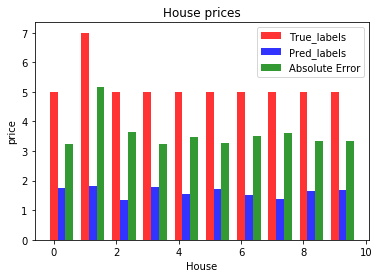

In [ ]:

import matplotlib.pyplot as plt #hiermee kun je grafieken maken

def dplot(true_labels,pred_labels,dlen,yrange = None,ax=None):
    # create plot
    if ax == None:
        fig, ax = plt.subplots()
    index = np.arange(dlen)
    bar_width = 0.25
    opacity = 0.8

    rects1 = ax.bar(index, true_labels[:dlen], bar_width, alpha=opacity,color='r',label='True_labels')
    rects2 = ax.bar(index + bar_width, pred_labels[:dlen], bar_width,alpha=opacity,color='b',label='Pred_labels')
    rects2 = ax.bar(index + 2*bar_width, abs(true_labels[:dlen]-pred_labels[:dlen]), bar_width,alpha=opacity,color='g',label='Absolute Error')

    ax.set_xlabel('House')
    ax.set_ylabel('price')
    ax.set_title('House prices')
    if yrange != None:
        ax.set_ylim(yrange)
    ax.legend()

    if ax == None:
        plt.show()
    
dplot(true_labels,pred_labels,10)

### Experimenteren

Probeer dit nog eens maar dan met andere aantallen neuronen in de layers. Dit kun je doen door hidden_layer_sizes aan te passen en de code_blokken vanaf dat punt opnieuw te runnen. Experimenteer ook met het aantal layers in je netwerk. Hou hieronder je resultaten bij. 




<tr> <th scope="col">hidden_layer_sizes</th> <th scope="col">MAE</th></tr>
<tr> <td>[20,20,10]</td> <td> ... </td></tr>
<tr> <td> [10,5] </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td></tr>





#### Welke hidden layer sizes geven het beste resultaat? Waardoor denk je dat dat komt?

## Voorspel bouwjaar

Gebruik wat je nu geleerd hebt om in dezelfde dataset te voorspellen in welk jaar het huis gebouwd was. Je mag boven dit code-block niks meer aanpassen, schrijf al je nieuwe code hieronder. Linksboven in je scherm kun je met de knop '+ code' nog een extra codeblock toevoegen als je dit nodig hebt.


Je kunt in de code blokken hierboven afkijken hoe we het hebben gedaan voor de prijs. Nu moet je hetzelfde doen, maar dan voor het bouwjaar

Eerst moet je de kolommen selecteren die als input variabelen zullen dienen en welke kolom het label wordt. Daarna moet je deze data normaliseren en opsplitsen in train en test sets.

In [ ]:
# ***voorbeeldoplossing*** 
input_data = dataset[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']] #'waterfront','view','condition','grade','sqft_above','sqft_basement',

#normalisatie
input_data = (input_data - input_data.mean()) / (input_data.max() - input_data.min())

labels = dataset[['yr_built']]
input_data_train, input_data_test, labels_train, labels_test = train_test_split(input_data,labels,test_size=0.2)
input_data.head(5)

bedrooms  bathrooms  sqft_living  sqft_lot    floors     price
0 -0.011238  -0.139345    -0.067917 -0.005729 -0.197724 -0.041730
1 -0.011238   0.016905     0.036989 -0.004764  0.202276 -0.000274
2 -0.041541  -0.139345    -0.098860 -0.003094 -0.197724 -0.047225
3  0.019065   0.110655    -0.009049 -0.006122 -0.197724  0.008382
4 -0.011238  -0.014345    -0.030181 -0.004257 -0.197724 -0.003946

Je moet een netwerk aanmaken en trainen op de train data

In [ ]:
# ***voorbeeldoplossing*** 
hidden_layer_sizes = [50,50,25]
network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes)
network.fit(input_data_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[50, 50, 25], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Als laatste moet je je netwerk gebruiken om predicties te maken over de test set en vervolgens de MAE te berekenen en te plotten met de functie dplot(true_labels,pred_labels,10,yrange = (1900,2020))

Het netwerk zit er gemiddeld 14 jaar naast


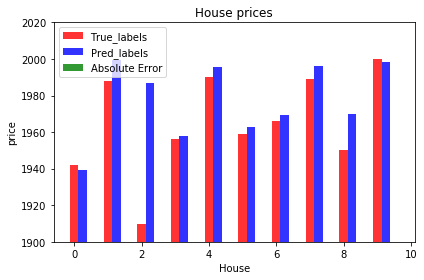

In [ ]:
# ***voorbeeldoplossing*** 

pred_labels = network.predict(input_data_test)
true_labels = labels_test['yr_built']

MAE = bereken_MAE(pred_labels,true_labels)

print('Het netwerk zit er gemiddeld {} jaar naast'.format(int(MAE)))

dplot(true_labels,pred_labels,10,yrange = (1900,2020))

### Experimenteren

#### Kijk of het netwerk een beter MAE score behaald als je het meer inputvariabelen geeft. Wat is de beste score die je dan kan behalen? Welke input variablen heb je hiervoor toegevoegd?

#### Welke input variabelen zijn, denk je, het meest belangrijk voor het bepalen van het bouwjaar?

#### haal de normalisatie weg, en beschrijf wat er gebeurt.

# Wine Quality

Nu gaan we kijken naar een dataset over wijn. De beschrijving van deze dataset is [hier](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) te vinden. Voer het volgende code-block uit en upload de dataset.

In [ ]:
files.upload()
dataset = pd.read_csv('winequality-red.csv',sep=';')
dataset.head(10)

Saving winequality-red.csv to winequality-red (2).csv


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5
5            7.4              0.66         0.00  ...       0.56      9.4        5
6            7.9              0.60         0.06  ...       0.46      9.4        5
7            7.3              0.65         0.00  ...       0.47     10.0        7
8            7.8              0.58         0.02  ...       0.57      9.5        7
9            7.5              0.50         0.36  ...       0.80     10.5        5

[10 rows x 12 columns]

bereken de gemiddelde kwaliteit van de wijn?


Je moet nu de kwaliteit van de wijn gaan voorspellen op basis van de andere kolommen. Eerst moet je input data selecteren, normaliseren en opslitsen in train en test sets.

In [ ]:
#
#input_data = ...
#
##normalisatie
#input_data = (input_data - input_data.mean()) / (input_data.max() - input_data.min())
#
#input_data_train, input_data_test, labels_train, labels_test = ...


# ***voorbeeldoplossing*** 
input_data = dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] 

#normalisatie
input_data = (input_data - input_data.mean()) / (input_data.max() - input_data.min())

labels = dataset[['quality']]
input_data_train, input_data_test, labels_train, labels_test = train_test_split(input_data,labels,test_size=0.2)



Het netwerk zit er gemiddeld 0.46811112655836207 punten naast


Daarna moet je een netwerk aanmaken, het trainen en de MAE berekenen

In [ ]:
hidden_layer_sizes = [20,20,20,5]
network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,max_iter=1000)
network.fit(input_data_train, labels_train['quality'])


pred_labels = network.predict(input_data_test)
true_labels = labels_test['quality']
MAE = bereken_MAE(pred_labels,true_labels)

print('Het netwerk zit er gemiddeld {} punten naast'.format(MAE:.4f))

We willen nu graag meer weten over hoe snel een netwerk iets leert. Daarvoor zullen nu we per epoch de MAE score berekenen.


## Wat is een epoch als we het hebben over neurale netwerken? (als je iets niet weet, zoek dan op het internet)


De onderstaande functie plot(=tekent een grafiek van) de MAE voor elke epoch. We kijken dus per epoch wat de MAE is van het netwerk over de test set

In [ ]:

def plot_MAE(train_errors,test_errors,yrange = None,ax=None):
    # create plot
    if ax == None:
        fig, ax = plt.subplots()

    ax.plot(train_errors,label = 'train MAE')
    ax.plot(test_errors, label = 'test_MAE')

    ax.set_xlabel('Epoch')
    ax.set_ylabel('MAE')
    ax.set_title('MAE over Epochs (current: '+str(test_MAE)[:5]+')')
    if yrange != None:
        ax.set_ylim(yrange)
    ax.legend()

    if ax == None:
        plt.show()
    


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


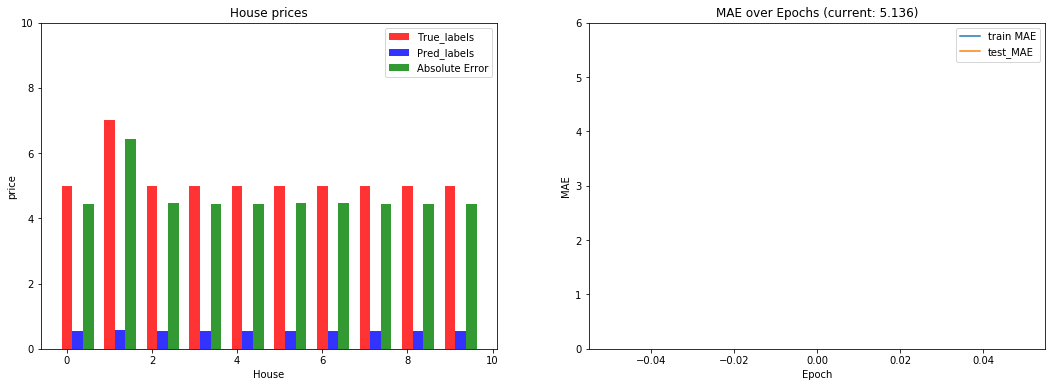

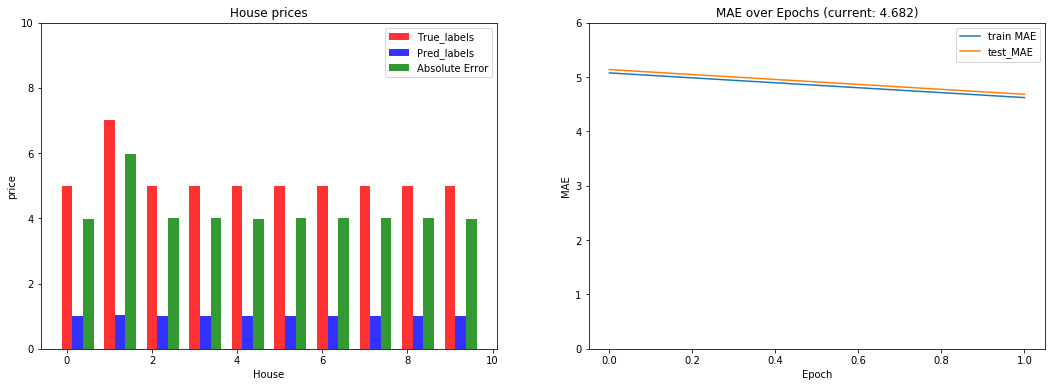

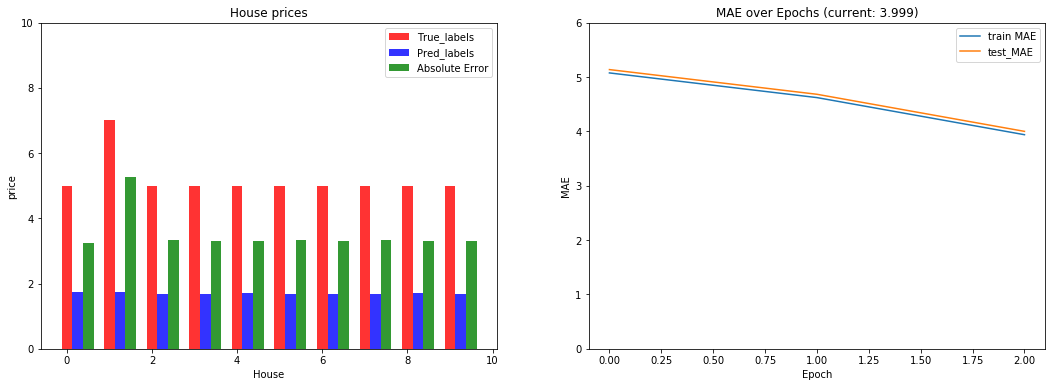

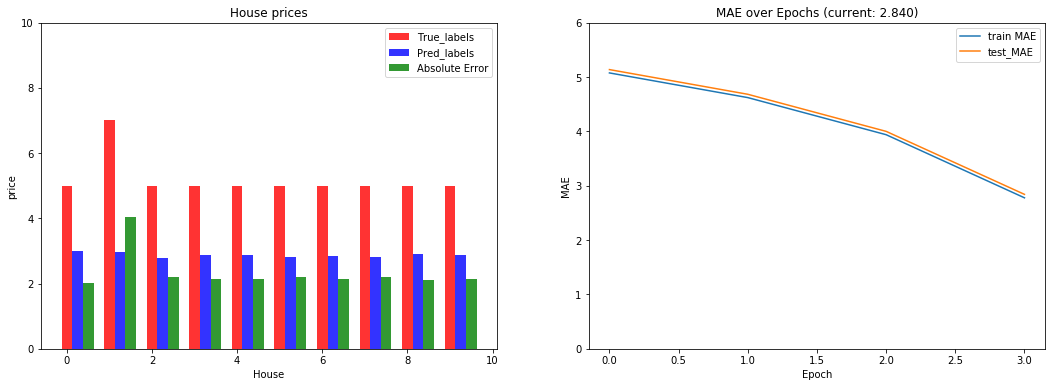

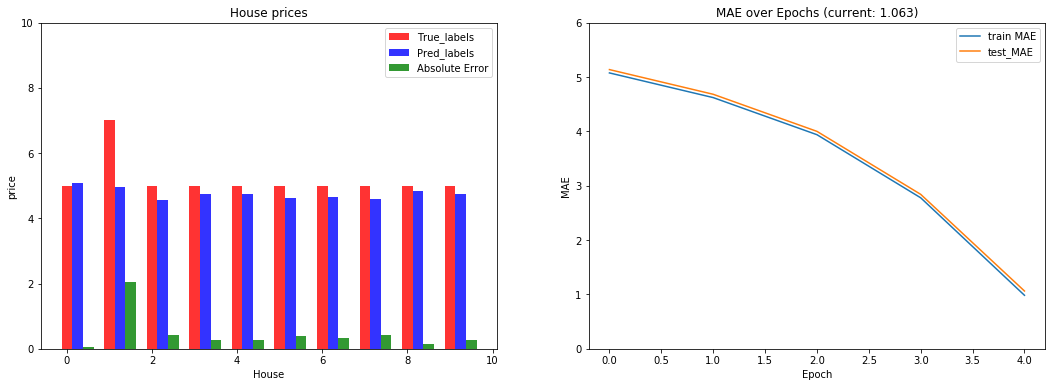

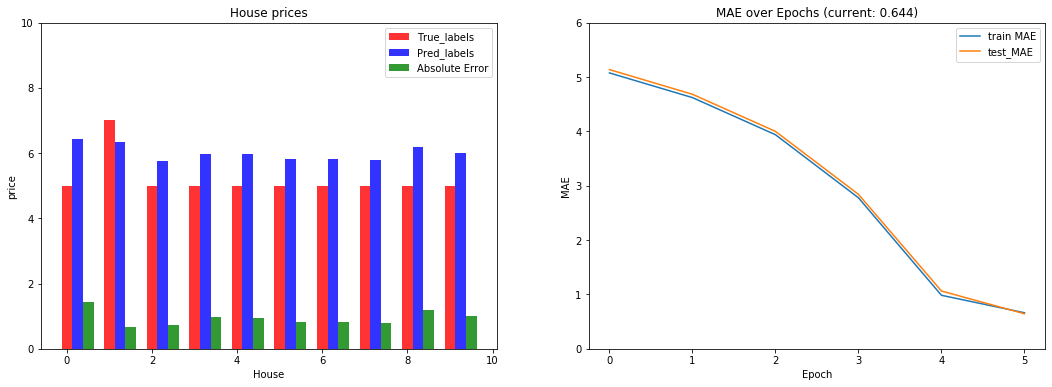

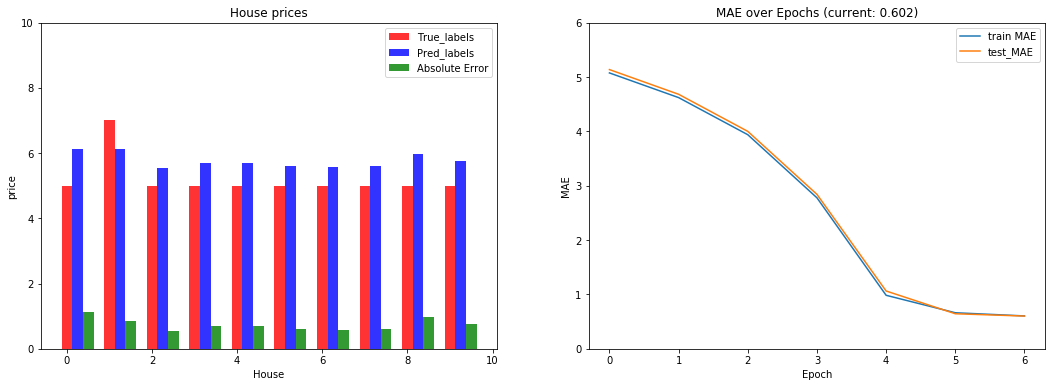

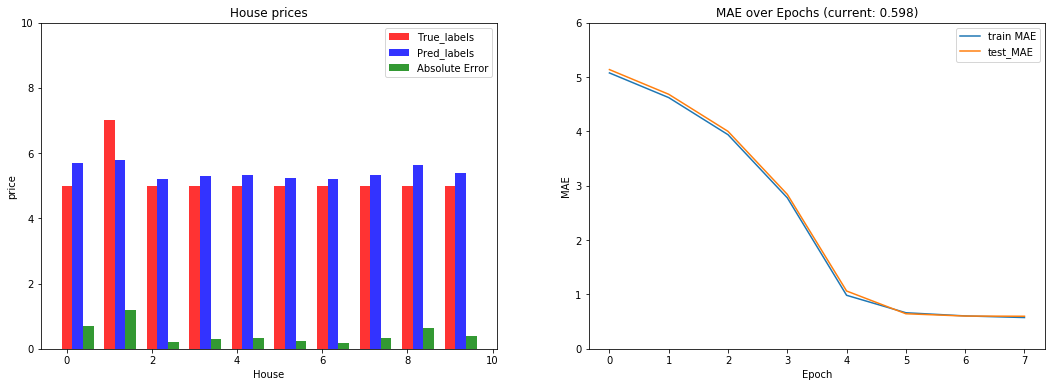

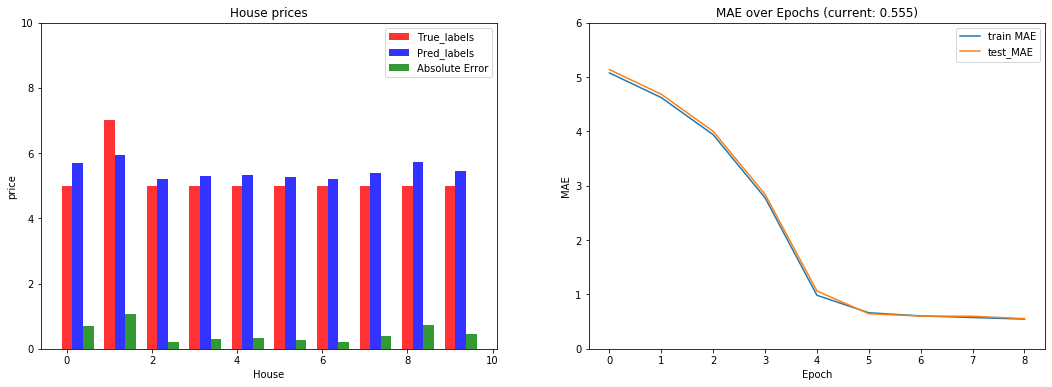

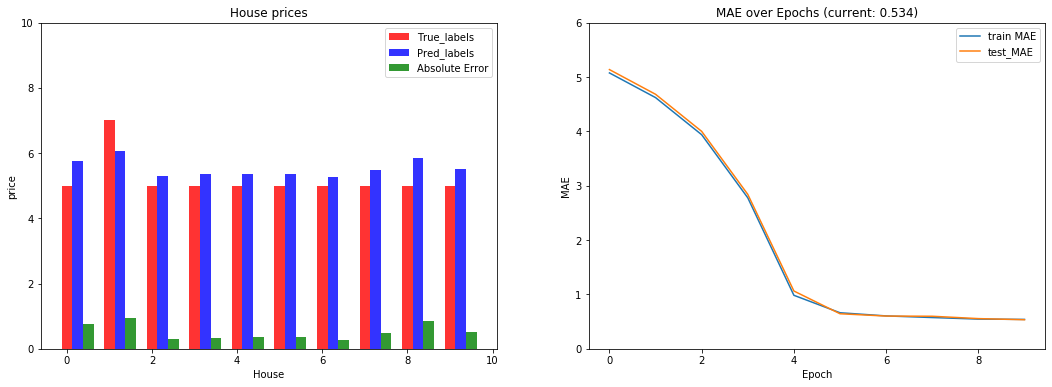

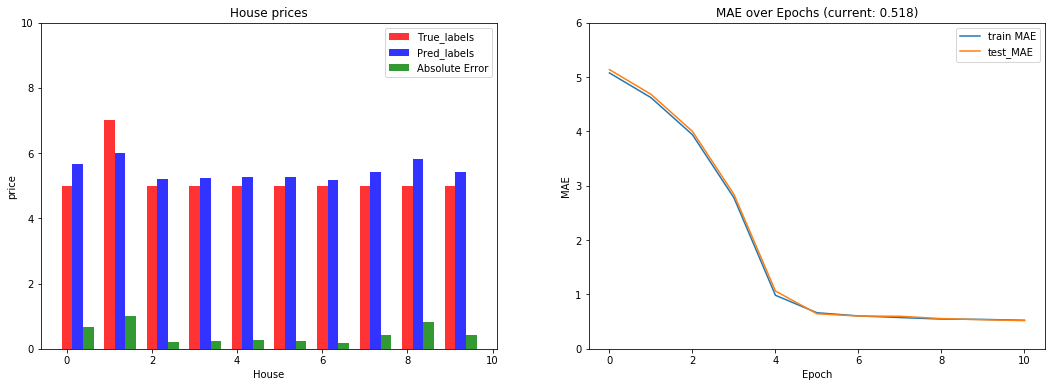

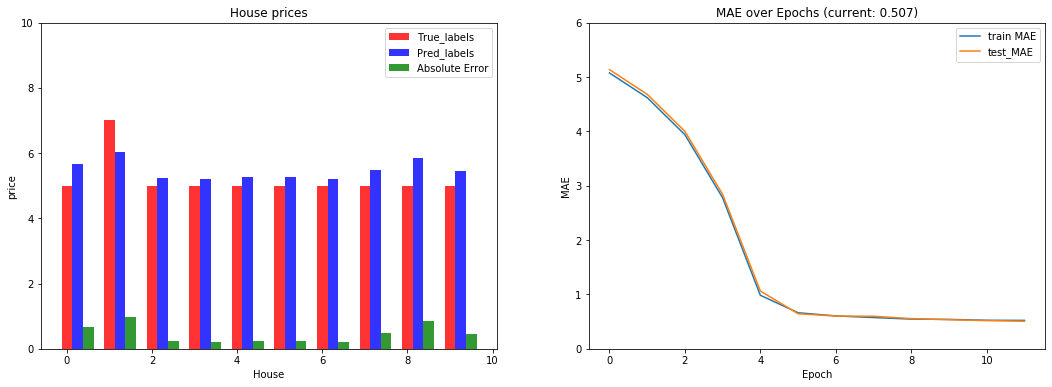

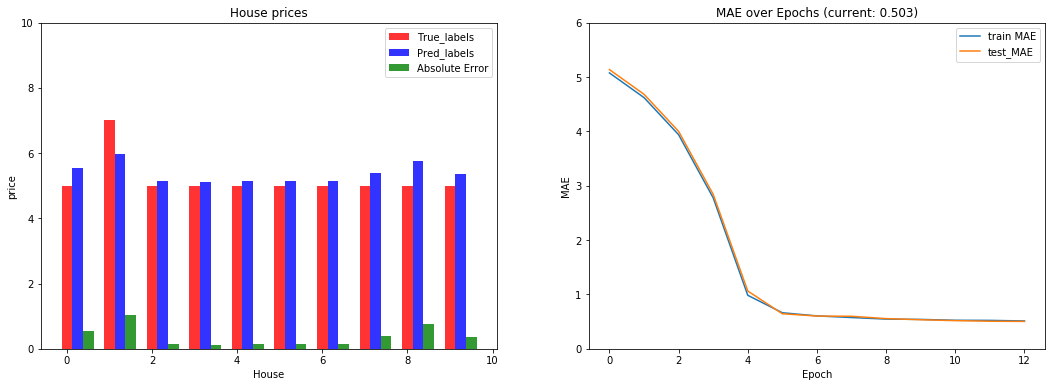

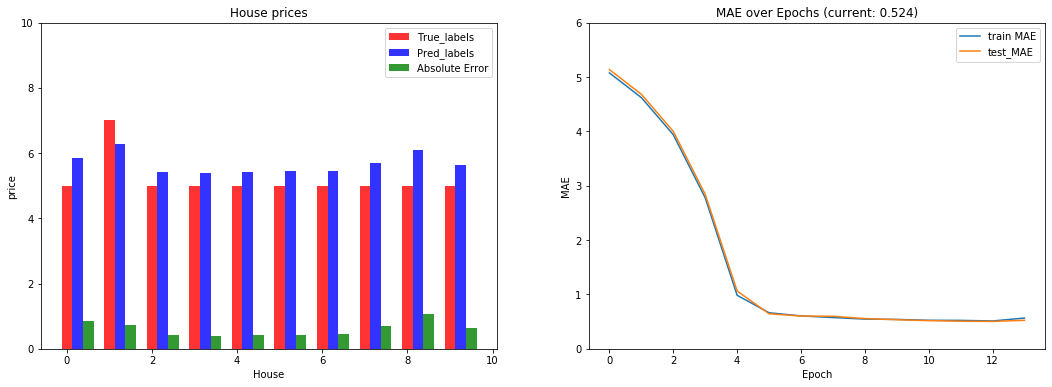

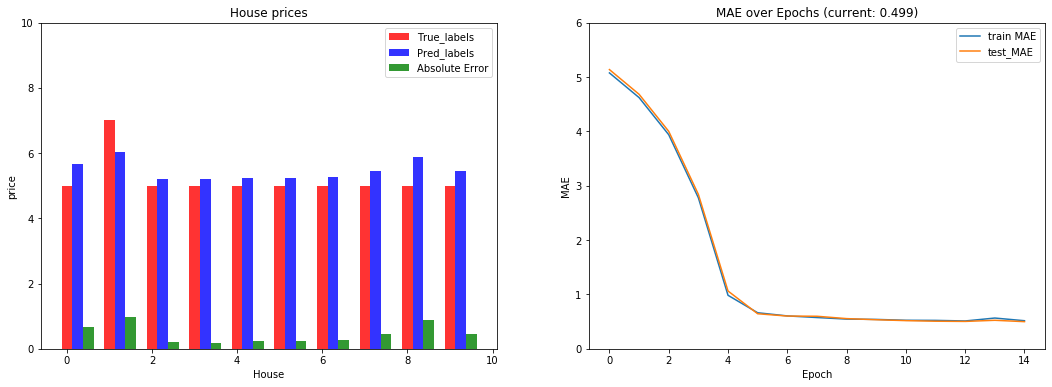

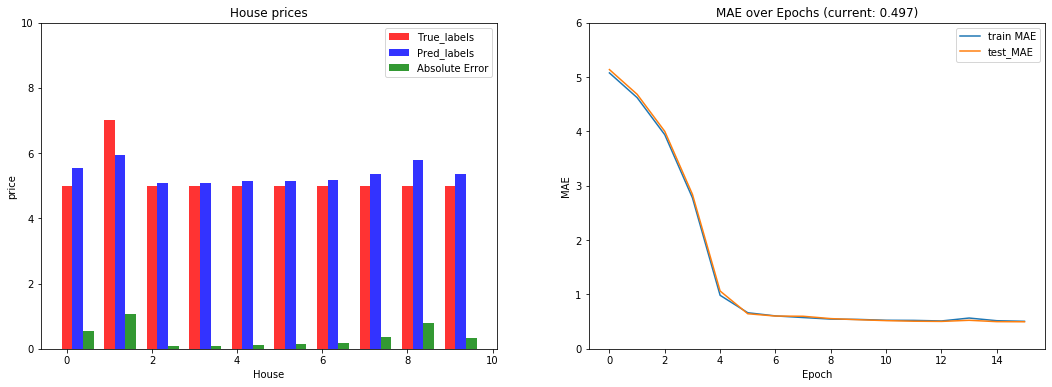

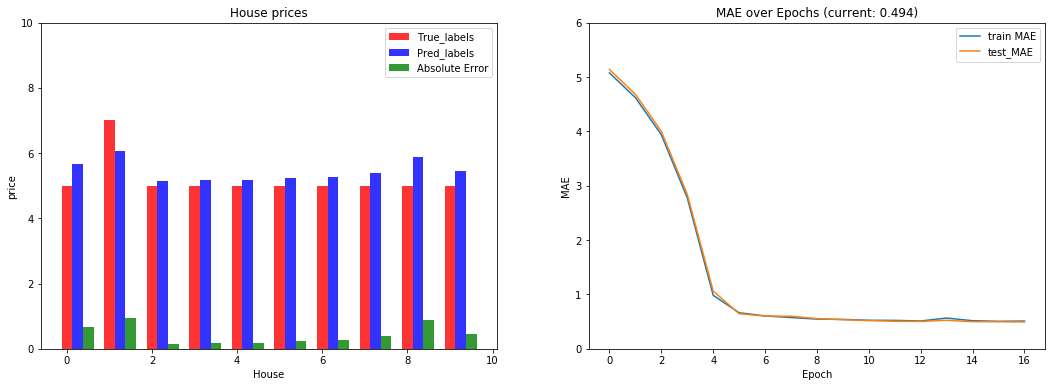

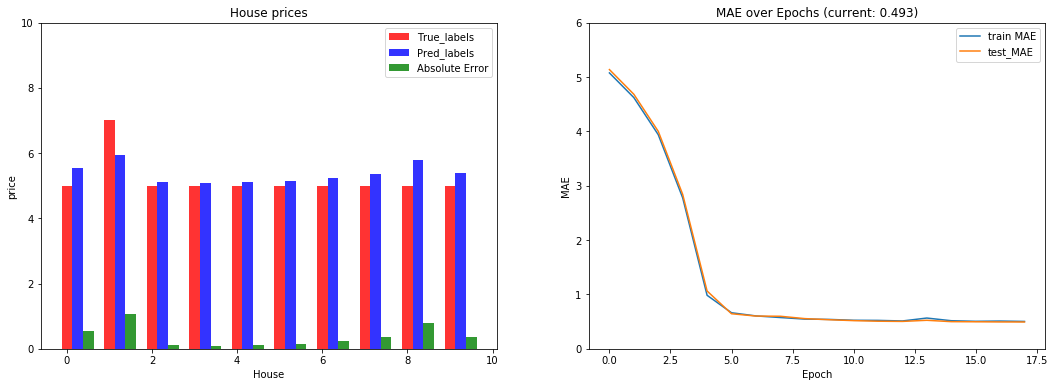

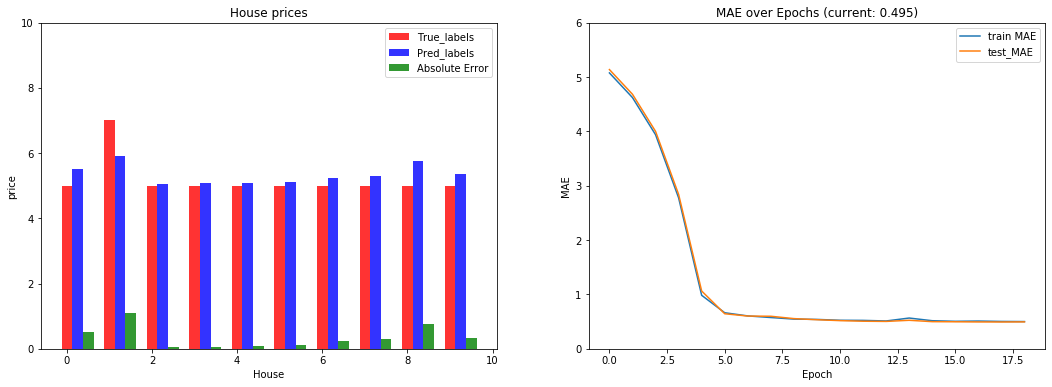

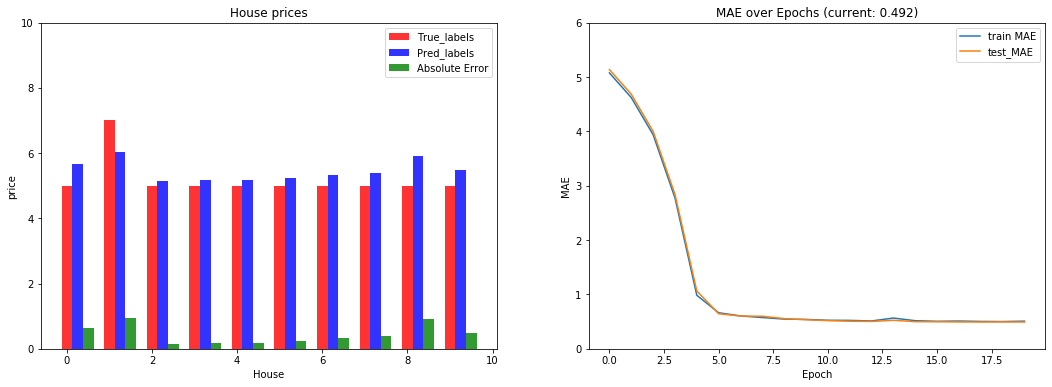

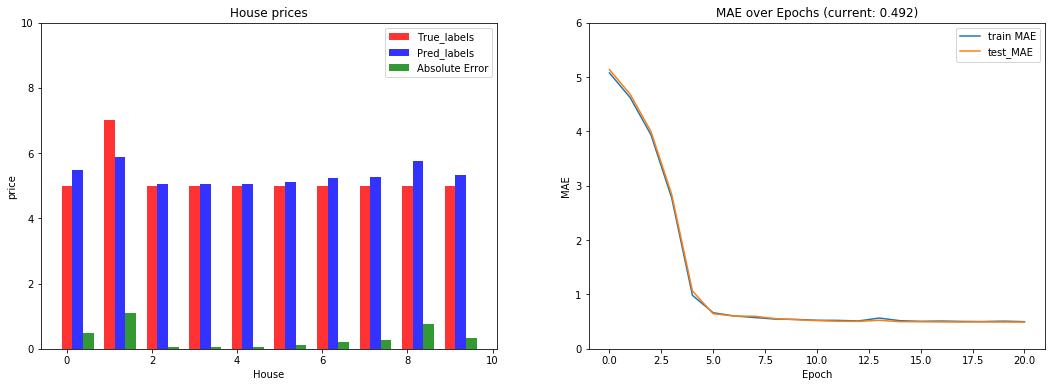

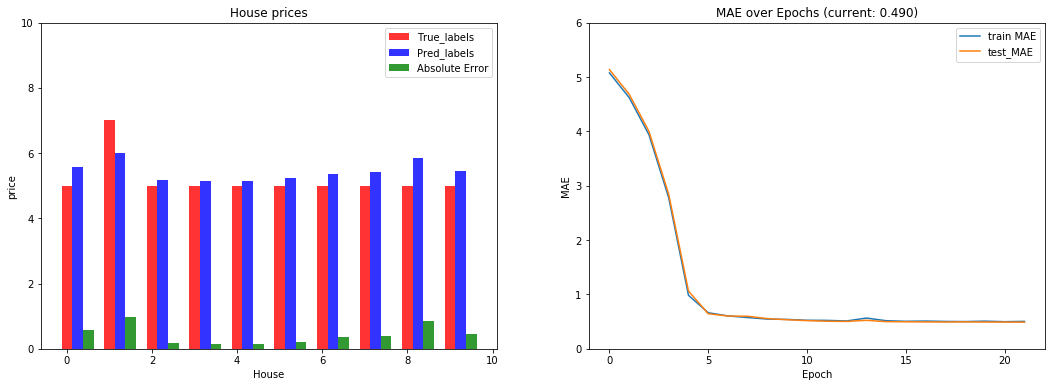

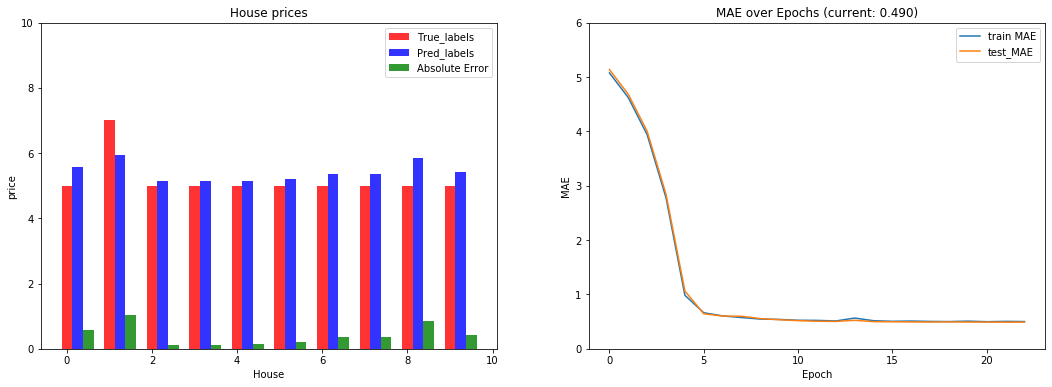

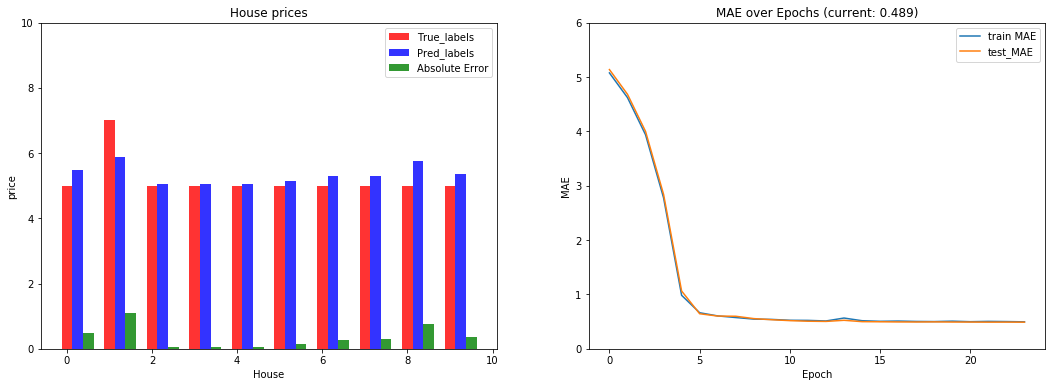

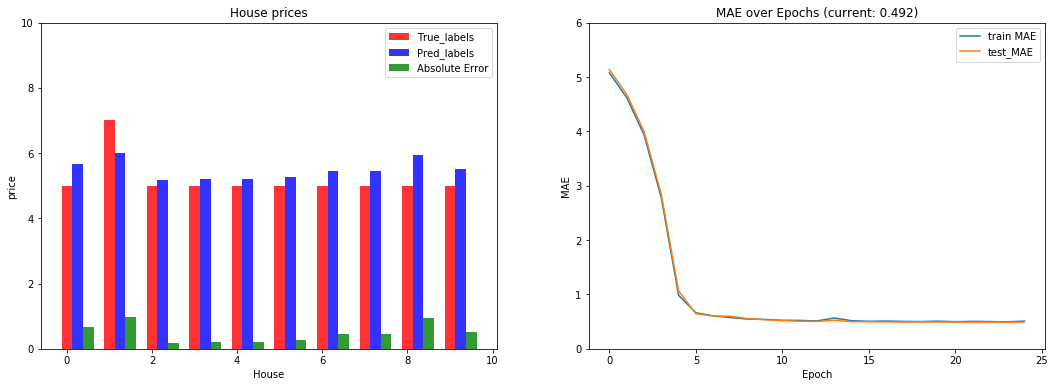

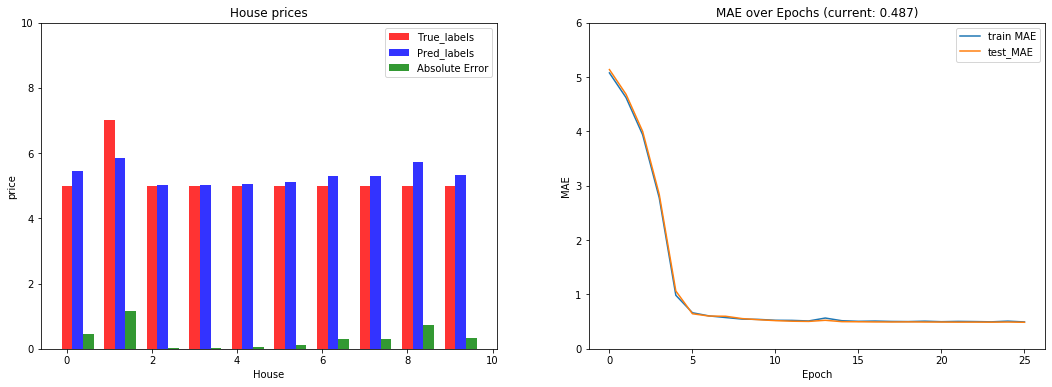

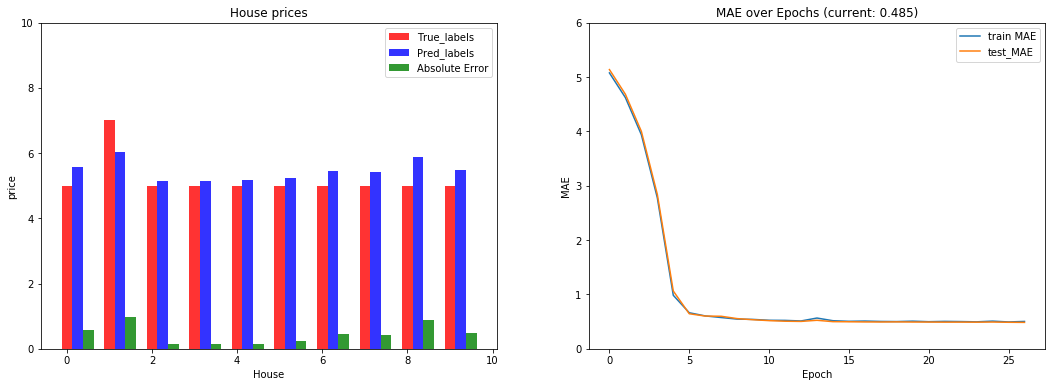

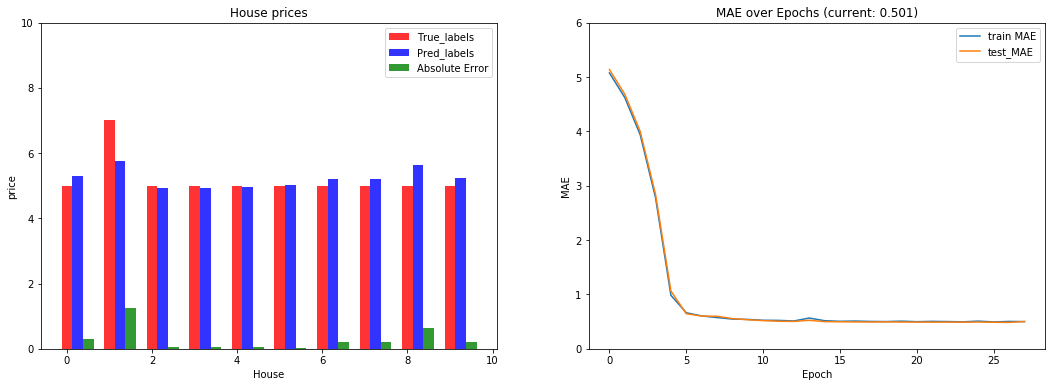

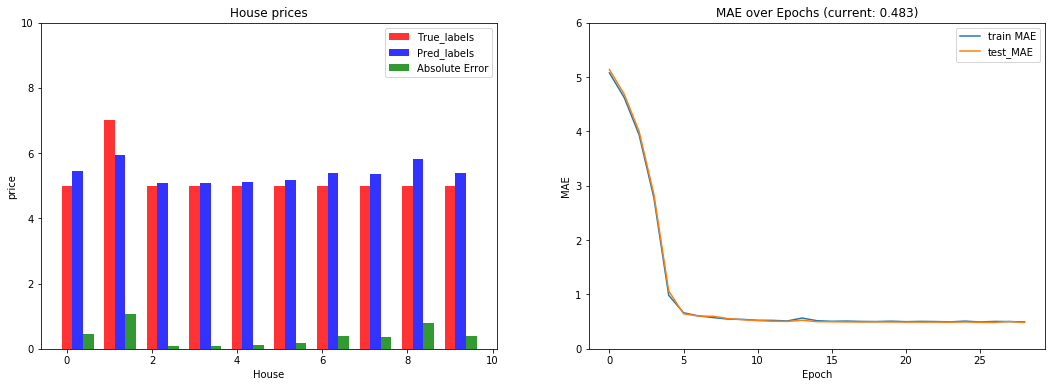

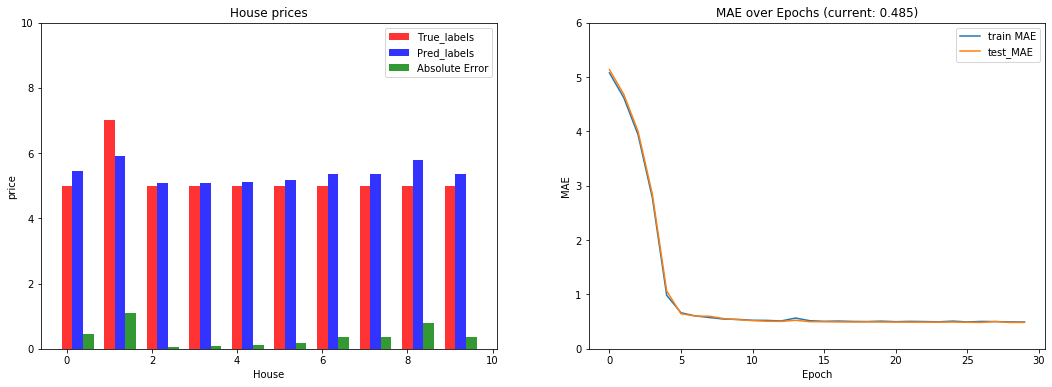

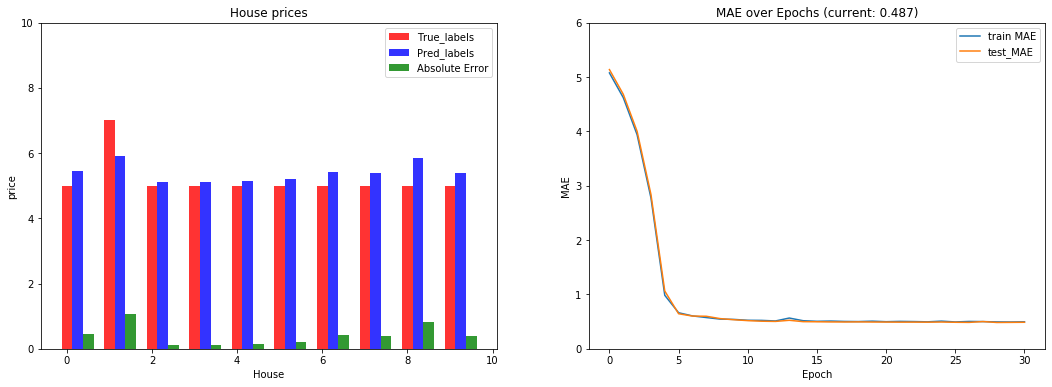

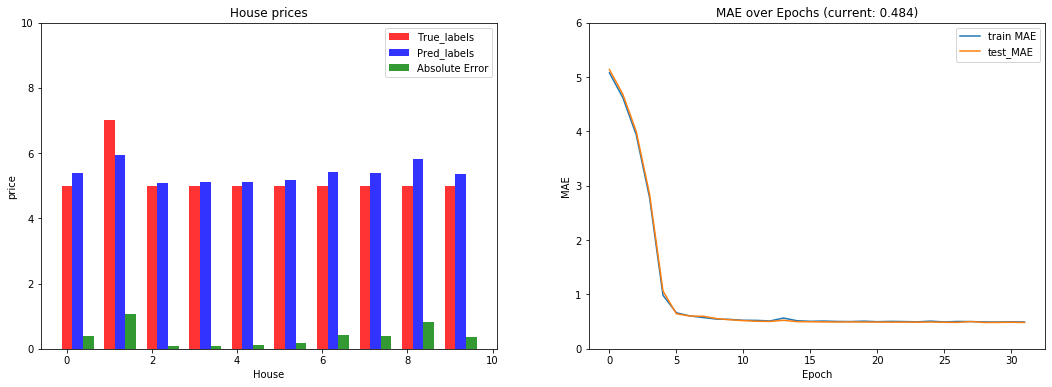

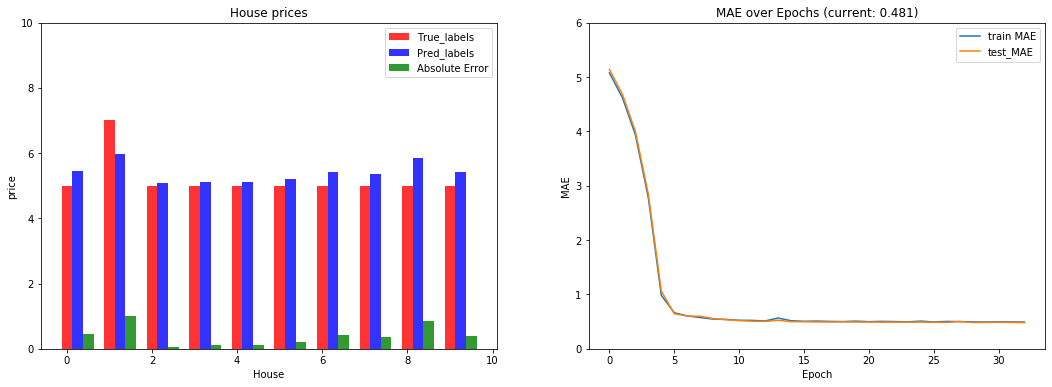

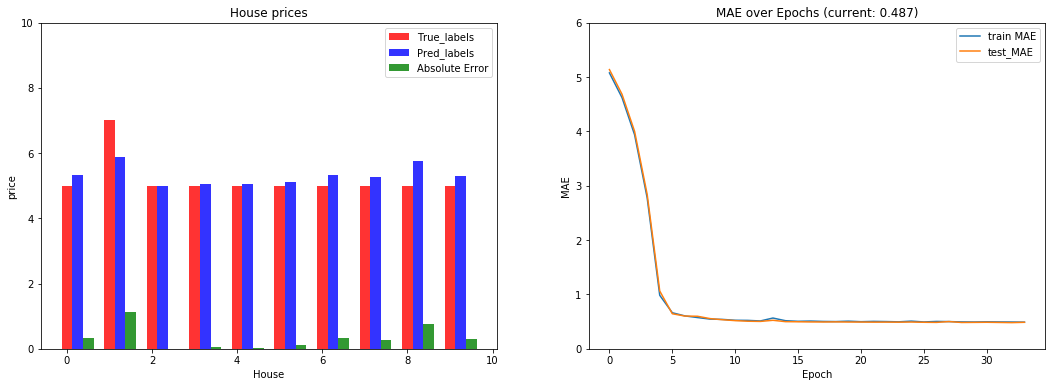

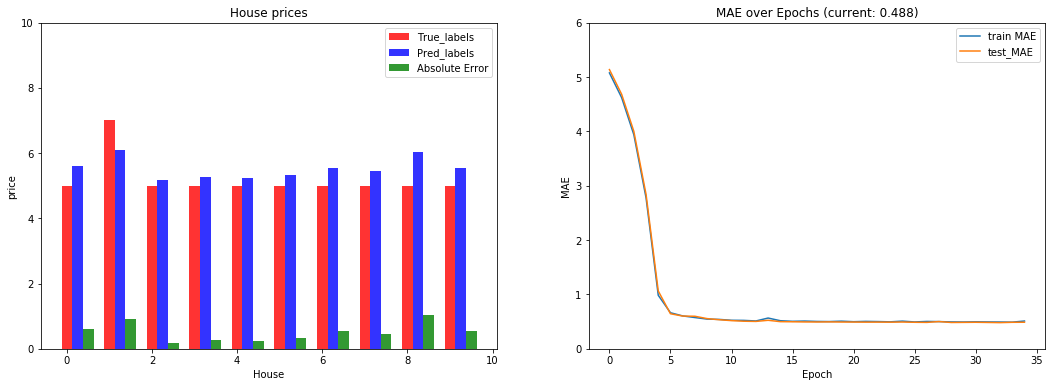

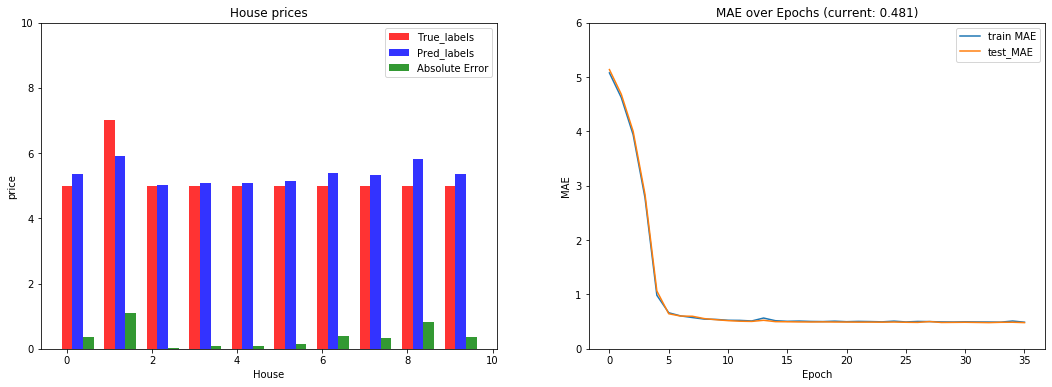

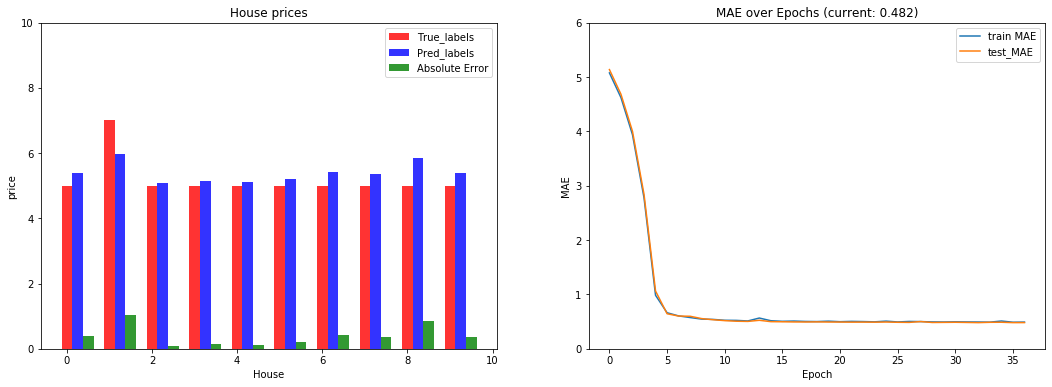

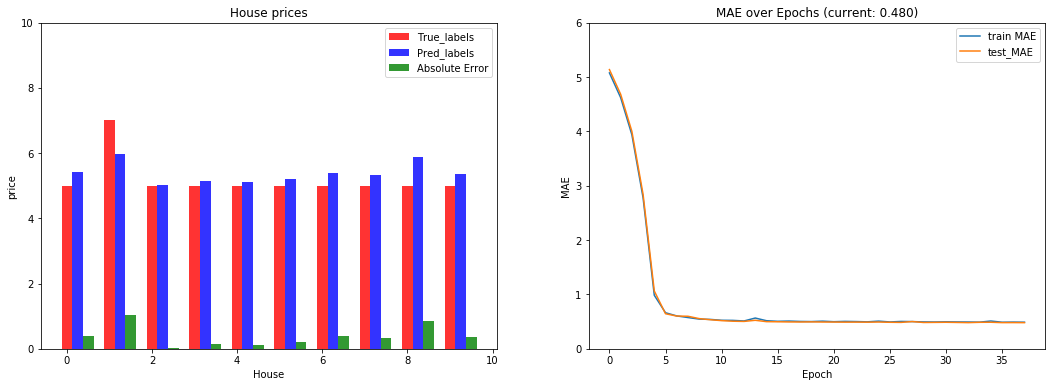

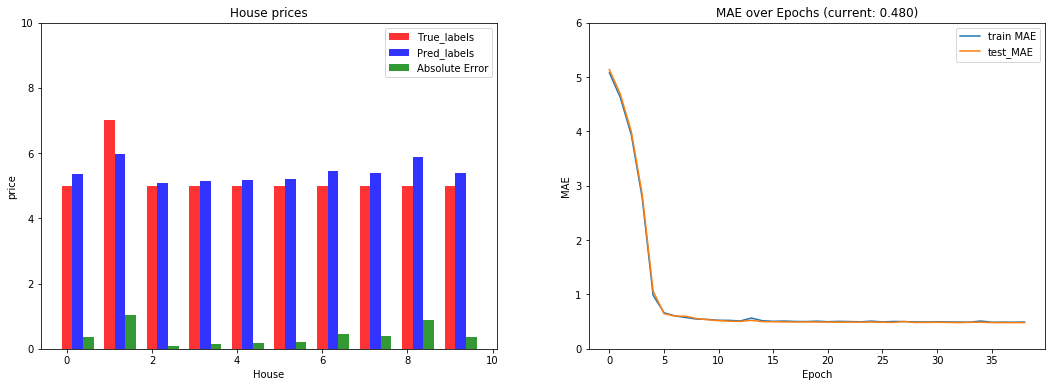

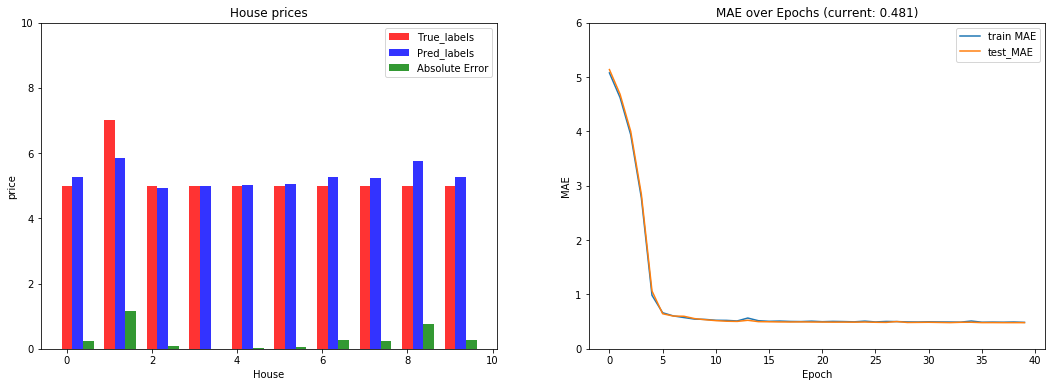

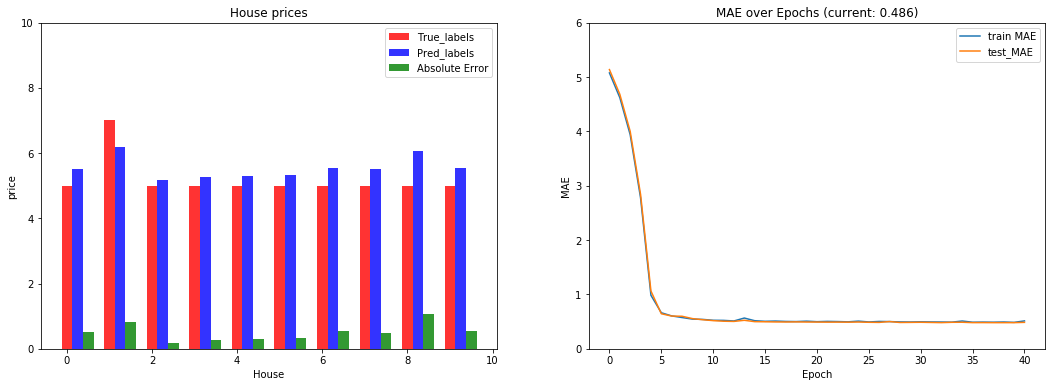

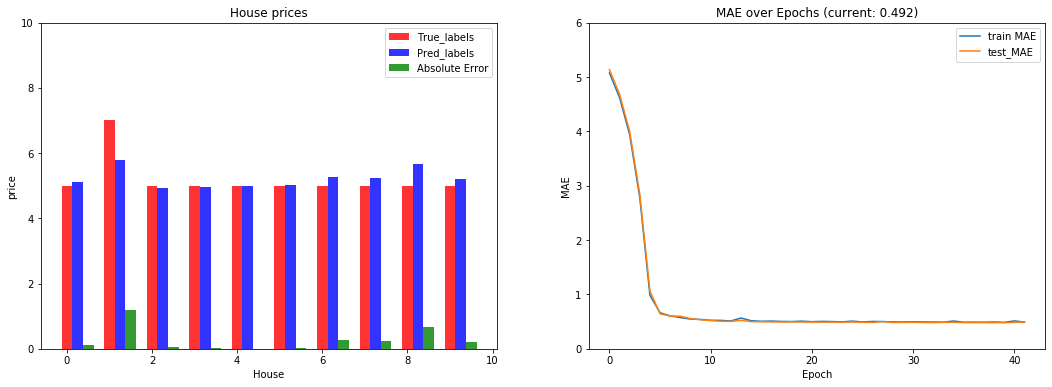

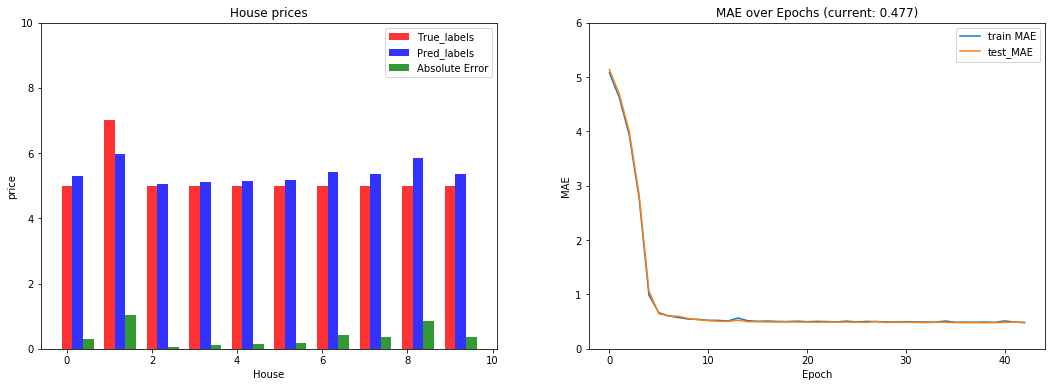

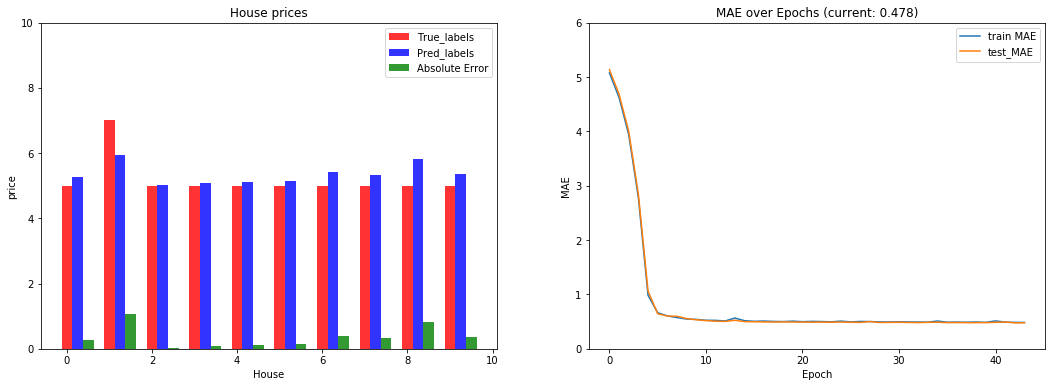

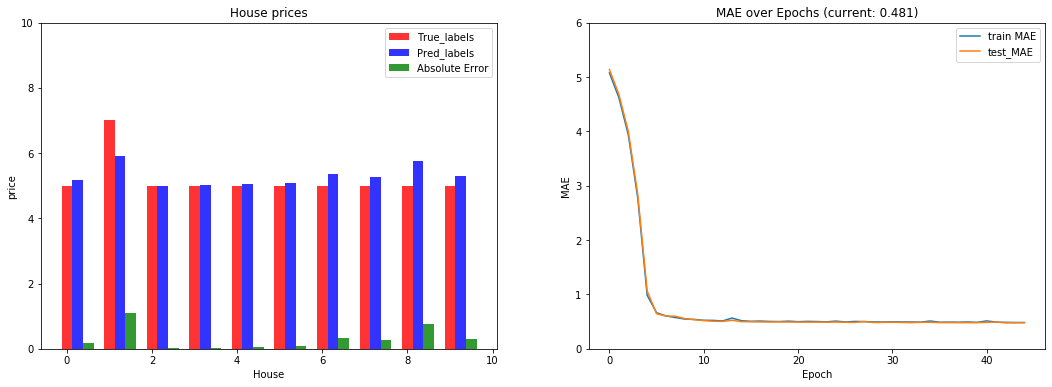

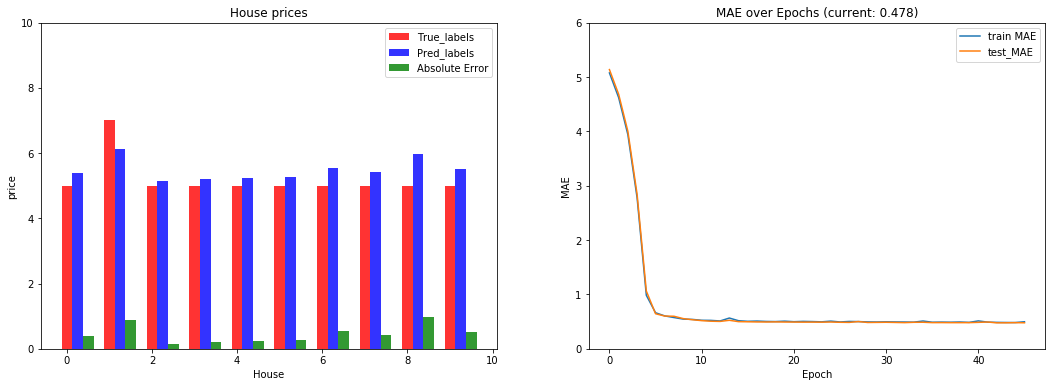

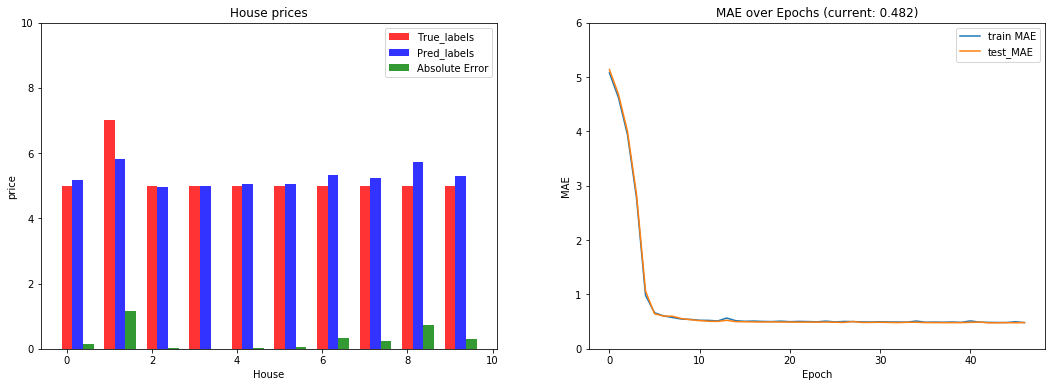

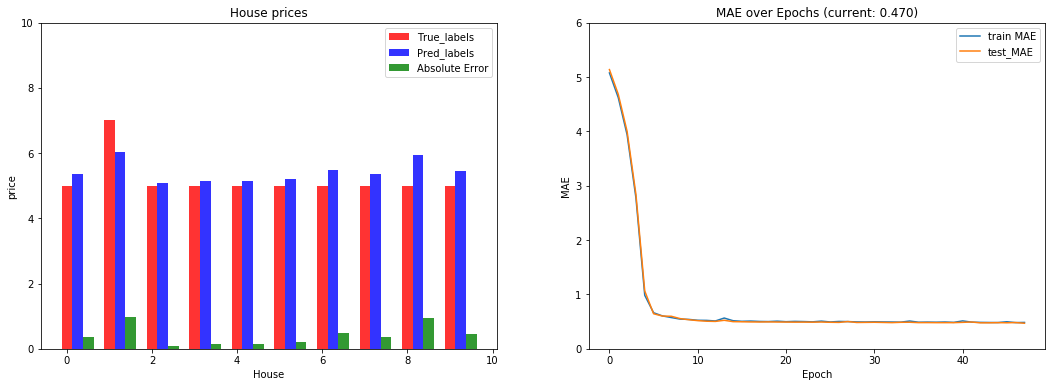

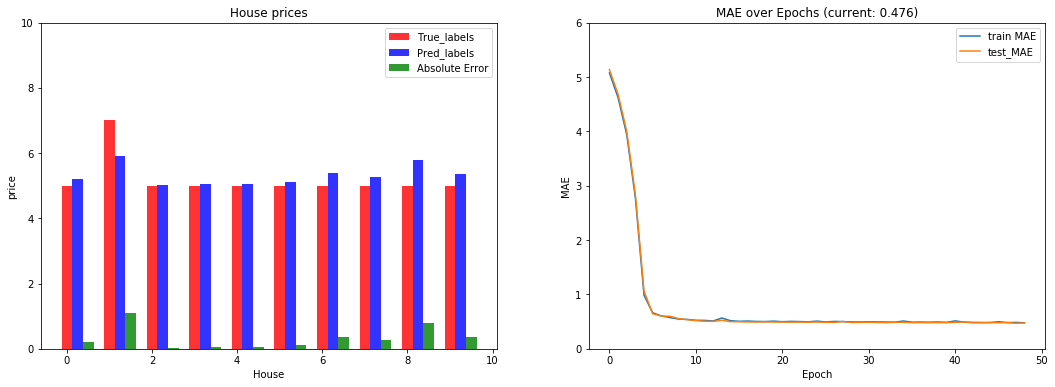

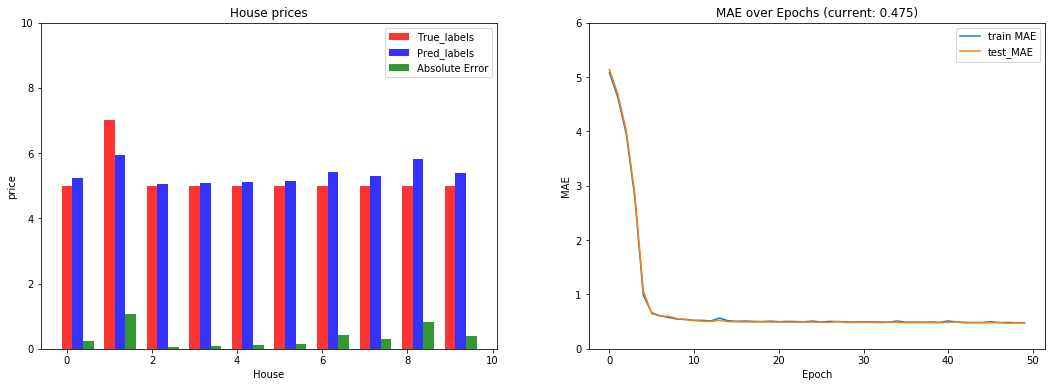

In [ ]:
hidden_layer_sizes = [50,50,50,50,50,50]
network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                       max_iter=1,  #run maar 1 epoch per keer dat we network.fit aanroepen
                       warm_start=True #ga verder met de gewichten van het netwerk uit de vorige network.fit (Als dit False was, werden de gewichten elke epoch weggegooit)
                       )
train_errors = []
test_errors = []

 
for epoch_num in range(50):
    network.fit(input_data_train, labels_train['quality'])
    
    #Bereken de MAE over de training data
    pred_labels = network.predict(input_data_train)
    true_labels = labels_train['quality']#??.values.flatten()
    train_MAE = bereken_MAE(pred_labels,true_labels)
    train_errors.append(train_MAE)

    #Bereken de MAE over de test data
    pred_labels = network.predict(input_data_test)
    true_labels = labels_test['quality']#??.values.flatten()
    test_MAE = bereken_MAE(pred_labels,true_labels)
    test_errors.append(test_MAE)

    #plot een aantal predictions en de MAE over de epochs 
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_subplot(121)
    dplot(true_labels,pred_labels,10,yrange = (0,10),ax=ax)
    ax = fig.add_subplot(122)
    plot_MAE(train_errors,test_errors,yrange = (0,6),ax=ax)
    plt.show()


Hieronder is een plot van de MAE over de Epochs maar dan wel op een andere schaal (meer ingezoomd). Je kunt de schaal zelf aanpassen door de waardes van de yrange parameter te veranderen.

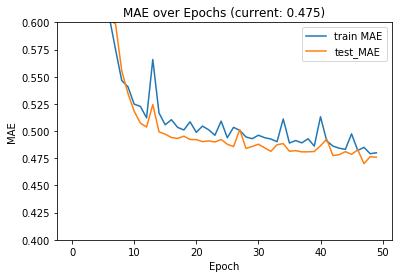

In [ ]:
plot_MAE(train_errors,test_errors,yrange = (0.4,0.6))

Experimenteer met de hoeveelheid neuronen per laag en het aantal lagen. Hou bij tijdens welke epoch de MAE stabiliseert en het 'close enough' is tot de eind MAE. Hieronder is dat gebied aangegeven.

![Punt van 'close enough' MAE](https://puc.science.ru.nl/seminar_neurale_netwerken/week1/werkcollege/MAE.png)


<tr> <th scope="col">hidden_layer_sizes</th> <th scope="col">Epoch</th><th scope="col">MAE</th></tr>
<tr> <td>[20,20,10]</td> <td> ... </td> <td> ... </td></tr>
<tr> <td> [50,50,50,50,50] </td> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td> <td> ... </td></tr>
<tr> <td> ... </td> <td> ... </td> <td> ... </td></tr>



Misschien heb je opgemerkt dat de kern van onze code, waarin we met het neurale netwerk werken, steeds opmerkelijk klein was:

In [ ]:
#training
hidden_layer_sizes = [20,20,10] #kies de gewichten
network = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes) #maak een netwerk
network.fit(input_data_train, labels_train['quality']) #train het netwerk

#tijd om te gebruiken
network.predict(input_data_test) # test het netwerk

Natuurlijk heb je wel code nodig om de input data in de juiste vorm te krijgen en om te meten hoe goed je netwerk het nou daadwerkelijk doet.

Dit is vaak het belangrijkste deel van een goed werkend neuraal netwerk.

In libraries die meer geavanceerd zijn dan sklearn (zoals Pytorch en Tensorflow/Keras) heb je veel meer invloed op hoe je netwerk specifiek werkt, maar ook daar is het belangrijkste dat je de goede data in het juiste formaat aanlevert en een goede objectieve meting kan doen naar de kwaliteit van het netwerk. In de praktijk besteed je 80% van de tijd aan data verzamelen, die data 'schoon' te maken en in de juiste vorm zetten zodat je netwerk er wat mee kan.

Dit is het einde van de opdrachten van week 1. Kijk als huiswerk de volgende twee videos.

In [ ]:
from IPython.display import HTML

def youtube_video(code):
    return HTML(f"<iframe width='1280' height='720'  src='https://www.youtube.com/embed/{code}' frameborder='0' allowfullscreen></iframe>")


In [ ]:
youtube_video('aircAruvnKk')

In [ ]:
youtube_video('IHZwWFHWa-w')

Volgende week gaan wij ook aan de slag met de MNIST digits. Tot dan!

<iframe width="560" height="315" src="https://www.youtube.com/embed/aircAruvnKk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>